Supervised learning is broadly classified to 

1. Regression
2. Classification


Regression mainly predicts the continuous response(numerical), where as the Classification predicts the categorical values

__The current note book deals with linear regression__.Linear Regression models the relationship between two variables using the linear equation. one variable is considered to be an explanatory variable (independent variable) and the other is called dependent variable.

A linear regression has the equation y = mX+c.  y is the dependent variable, X is the independent(explanatory variable), m is the slope and c is the intercept (c is the value of y when X=0)

__Least Squares Regression__: The most common method used to fit the regression line is method of least squares. The distance between the actual data point and the regression line is called residuals. 

The method of least squares determines the best fitting line by selecting squared residuals with least value

In [63]:
#import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline


In [64]:
adv_df = pd.read_csv("Advertising.csv")

In [65]:
#get the feel of the data

adv_df.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [66]:
adv_df.tail(10)

,Unnamed: 0,TV,radio,newspaper,sales
190,191,39.5,41.1,5.8,10.8
191,192,75.5,10.8,6.0,9.9
192,193,17.2,4.1,31.6,5.9
193,194,166.8,42.0,3.6,19.6
194,195,149.7,35.6,6.0,17.3
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [67]:
adv_df.shape

(200, 5)

In [68]:
adv_df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [69]:
adv_df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [70]:
adv_df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

__insights about the data__

1. There are no null or na values in any of the columns
2. There are total of 200 rows and 5 columns
3. TV, radio and newspaper are the features
4. Sales is the response



C:\Users\Durgaprasad.K\Continuum\miniconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


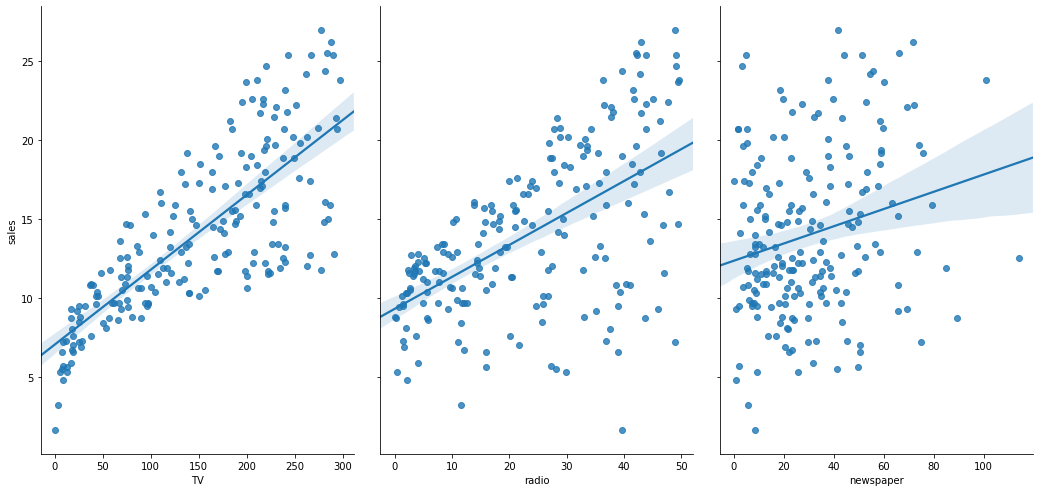

In [71]:
#Visualizing the data
sns.pairplot(adv_df,x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

__From the above visualization we can conclude that__

1. There is strong relation between the sales and TV adv
2. Weak relation between the sales and radio adv
3. very weak or no relation bwn the sales and newspaper adds

The above conclusion can be crosschecked with corelation method as shown below

TV- Sales :: 0.79
Radio - Sales :: 0.58
newspapers - Sales :: 0.22

In [72]:
adv_df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [73]:
#split the features and the response series

features = ['TV', 'radio','newspaper']
X = adv_df[features]
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [74]:
Y = adv_df['sales']

In [75]:
Y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [76]:
X_train,X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=1)

In [77]:
linReg = LinearRegression();
linReg.fit(X_train,y_train)
y_pred = linReg.predict(X_test)

In [78]:
print(linReg.coef_)
print(linReg.intercept_)

[0.04656457 0.17915812 0.00345046]
2.8769666223179318


In [79]:
list(zip(features,linReg.coef_))

[('TV', 0.04656456787415028),
 ('radio', 0.17915812245088836),
 ('newspaper', 0.0034504647111804347)]

__Mean Absolute Error__

In [80]:
metrics.mean_absolute_error(y_test,y_pred)

1.0668917082595213

__Root Mean Squared Error__

In [81]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1.4046514230328955